DeepLearning with Tensor flow Keras and Multiclassification

In [1]:
import pandas as pd
import numpy as np


In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt


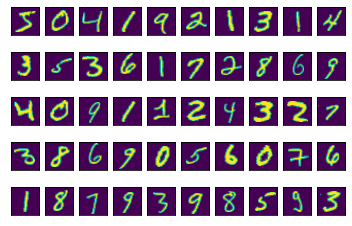

In [8]:
for digit_num in range(0,50):
    plt.subplot(5,10,digit_num+1)
    mat_data=X_train[digit_num].reshape(28,28)
    plt.imshow(mat_data)
    plt.xticks([])
    plt.yticks([])

In [9]:
# Each image sixe is 28 * 28 
28*28

784

In [10]:
y_train[0:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [12]:
# Scale the images
# Because max value for pixel is 255 
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)

In [15]:
X_train.shape

(60000, 784)

In [16]:
X_test.shape

(10000, 784)

In [17]:
X_train[0:50]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
model=Sequential()

In [23]:
# First Hidden Layer
model.add(Dense(units=128,activation='relu',input_shape=(784,)))

# Second Hidden Layer
model.add(Dense(units=64,activation='relu'))

# Third Hidden Layer 
model.add(Dense(units=32,activation='relu'))

# Output Layer

model.add(Dense(units=10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 784 feature and 1 is bias
(784+1)*128

100480

In [26]:
model.compile(optimizer=Adam(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# Here number of outputs are 0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9  so  output units is 10

In [27]:
result=model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4956 - accuracy: 0.8362
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9390
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1596 - accuracy: 0.9515
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9590
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9629
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9673
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9690
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - accuracy: 0.9716
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9731
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.085

In [28]:
60000/32

1875.0

In [29]:
# Batches of 1875


In [31]:
model.predict(X_train[0:5])

array([[4.86794806e-11, 1.77997103e-12, 1.65686844e-14, 7.60090625e-05,
        8.75335960e-15, 9.99923944e-01, 6.64073484e-12, 1.30109385e-14,
        1.75809933e-09, 2.61702944e-08],
       [9.99999881e-01, 7.95123307e-28, 6.10512618e-09, 1.90876683e-08,
        6.60185170e-11, 3.86215691e-13, 1.96119121e-10, 1.98516452e-14,
        2.68542077e-10, 1.64112279e-07],
       [5.07604796e-03, 1.26047363e-03, 3.29740276e-03, 1.95070854e-04,
        9.39845800e-01, 4.39457316e-03, 1.08942529e-03, 1.13872625e-02,
        1.39370316e-03, 3.20602097e-02],
       [0.00000000e+00, 9.99998331e-01, 5.85366131e-11, 2.57917993e-12,
        1.05221112e-08, 1.22827123e-13, 1.60387049e-06, 9.32683974e-09,
        1.59933322e-09, 5.36003603e-11],
       [4.72525673e-15, 7.46611883e-10, 2.66899235e-16, 7.65646924e-09,
        6.18615786e-07, 8.59974647e-10, 0.00000000e+00, 2.53631242e-06,
        1.62676450e-09, 9.99996781e-01]], dtype=float32)

In [32]:
y_train_pred=np.argmax(model.predict(X_train),axis=1)

In [33]:
y_test_pred=np.argmax(model.predict(X_test),axis=1)

In [34]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
print("Confusion Matrix")
print(confusion_matrix(y_pred=y_train_pred,y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred=y_train_pred,y_true=y_train)}")

Confusion Matrix
[[5904    0    3    1    0    6    4    0    3    2]
 [   0 6678   12    5   10    1    6   24    2    4]
 [   7    2 5919    5    4    3    0   13    5    0]
 [   1    1   28 6051    0   21    0   14    3   12]
 [   0    1    4    0 5767    0   11    6    0   53]
 [   3    1    1   18    0 5375   14    2    2    5]
 [   4    2    1    0    1   15 5892    0    3    0]
 [   0    2   10    0    0    0    0 6230    0   23]
 [   9   10   11   83    2   30   10    2 5658   36]
 [  10    0    0    6    8    3    0   12    4 5906]]


 Accuracy 0.9896666666666667


In [38]:
print("Confusion Matrix")
print(confusion_matrix(y_pred=y_test_pred,y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred=y_test_pred,y_true=y_test)}")

Confusion Matrix
[[ 970    0    1    2    1    2    1    1    2    0]
 [   0 1117    5    1    1    1    2    5    3    0]
 [   4    1 1012    3    0    0    1    8    3    0]
 [   1    0    6  986    0    7    0    5    0    5]
 [   2    0    3    0  955    2    5    2    0   13]
 [   2    0    0    9    1  869    3    2    4    2]
 [   4    2    1    1    2    5  942    0    1    0]
 [   1    1   12    0    1    0    0 1000    1   12]
 [   4    1    8   20    4   10    5    6  908    8]
 [   2    2    0    4    6    6    0    4    2  983]]


 Accuracy 0.9742


In [43]:
history=pd.DataFrame(result.history)
history.head()


,loss,accuracy
0,0.495607,0.836217
1,0.200401,0.939033
2,0.159641,0.951533
3,0.135971,0.958967
4,0.120843,0.962900


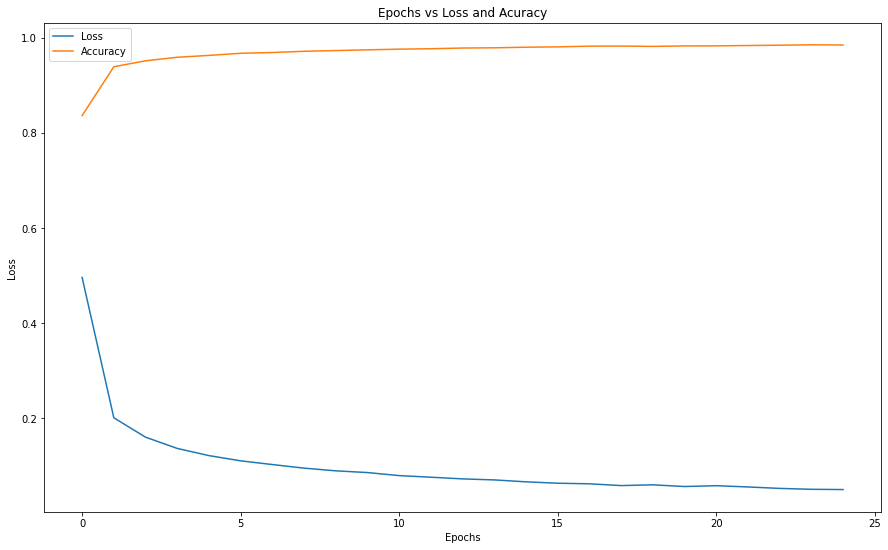

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.plot(history.loss,label='Loss')
plt.plot(history.accuracy,label='Accuracy')
plt.title('Epochs vs Loss and Acuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()